# **Part 1- Supervised Learning**

## Bank client data:

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [16]:
bank_data=pd.read_csv("https://raw.githubusercontent.com/aishuej/dataset/main/bank.csv",sep=";")
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## **Q1. Perform EDA on the given data. What does the primary analysis of several categorical features reveal?**

In [17]:
bank_data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [18]:
bank_data.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [19]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [20]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [21]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [22]:
bank_data.duplicated().sum()

12

In [23]:
bank_data[bank_data.duplicated(keep=False)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no


In [24]:
bank_data=bank_data.drop_duplicates()

In [25]:
bank_data.duplicated().sum()

0

Text(0.5, 1.0, 'Distribution of Target Variable')

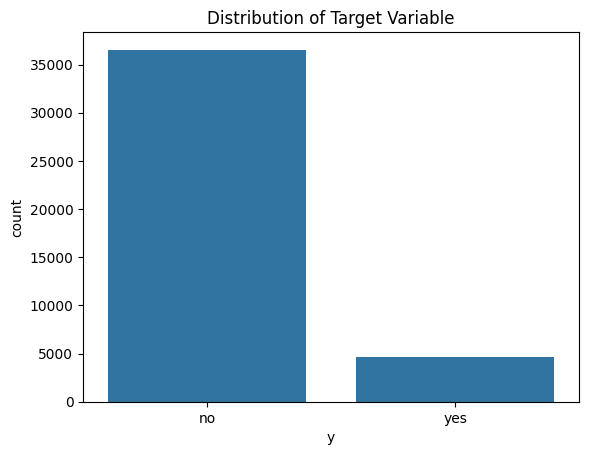

In [26]:
sns.countplot(x='y', data=bank_data)
plt.title('Distribution of Target Variable')

In [82]:
bank_data.select_dtypes(include='object').columns

Index([], dtype='object')

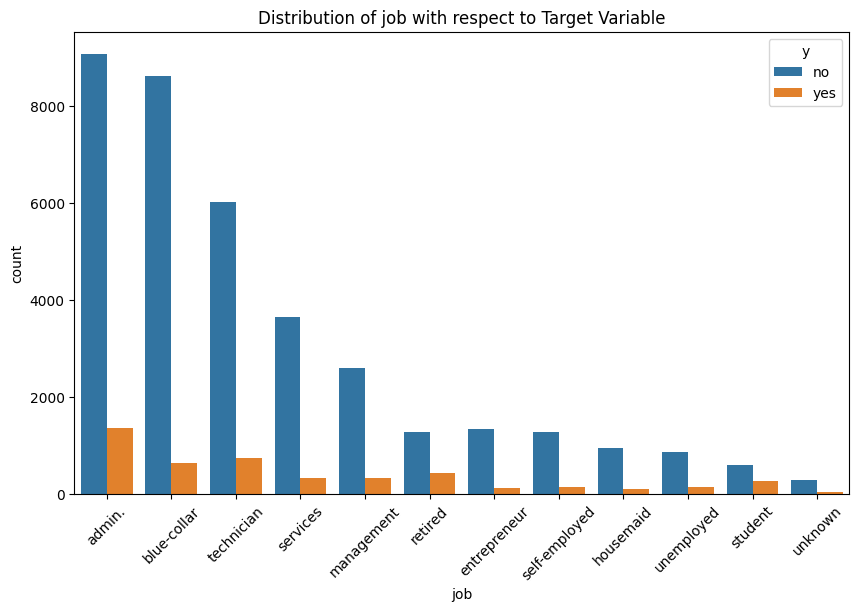

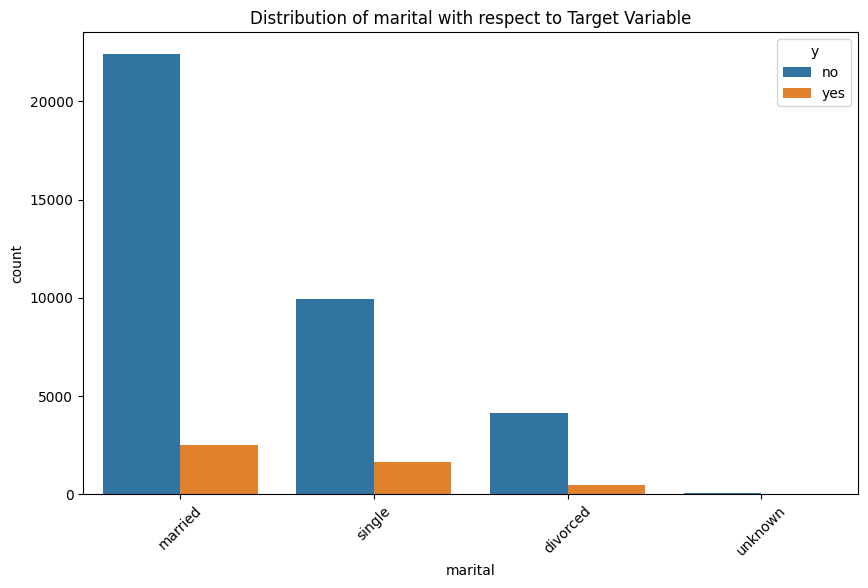

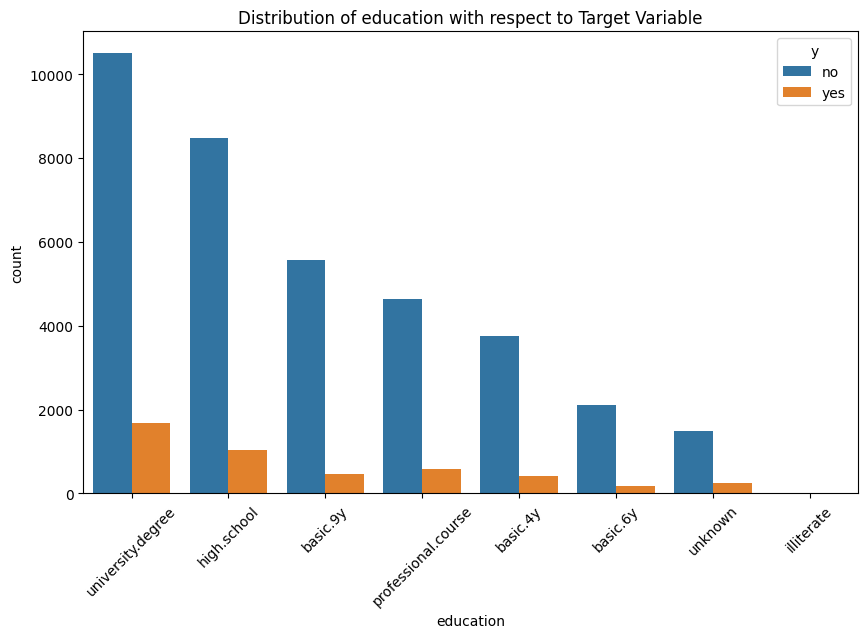

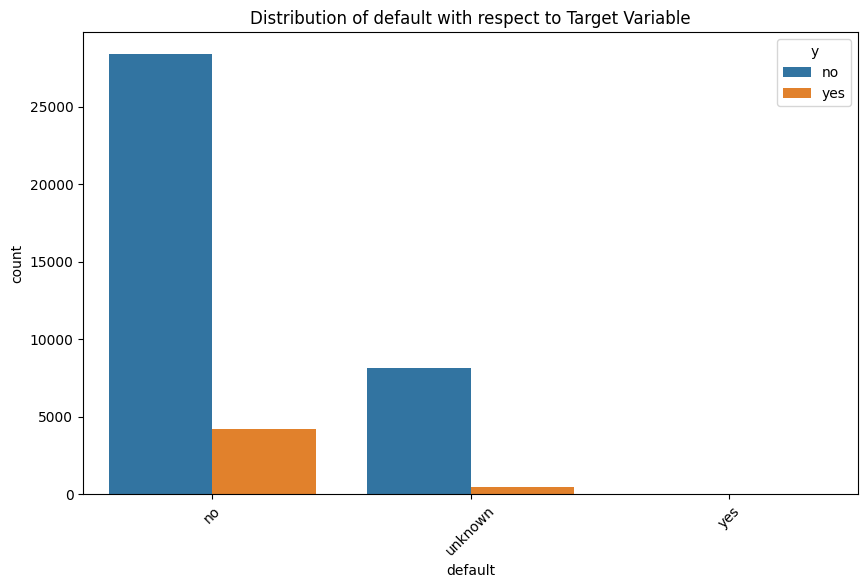

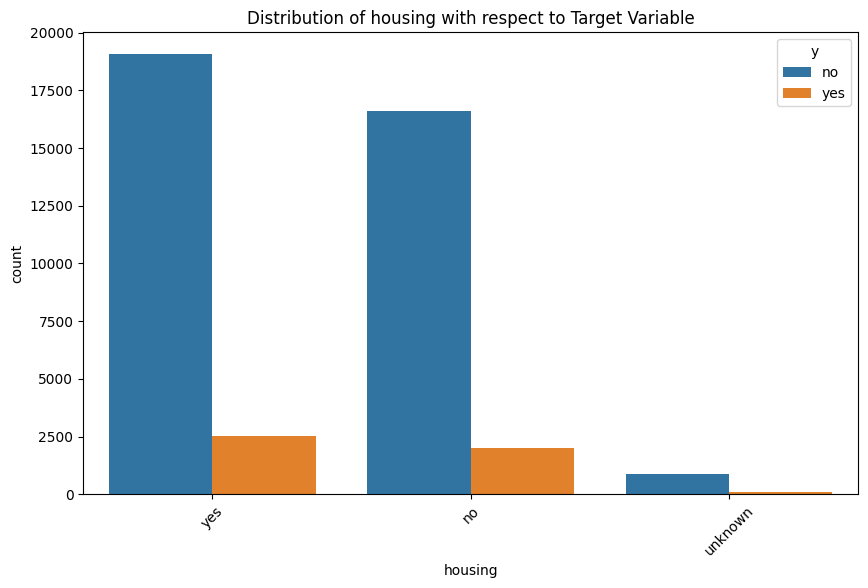

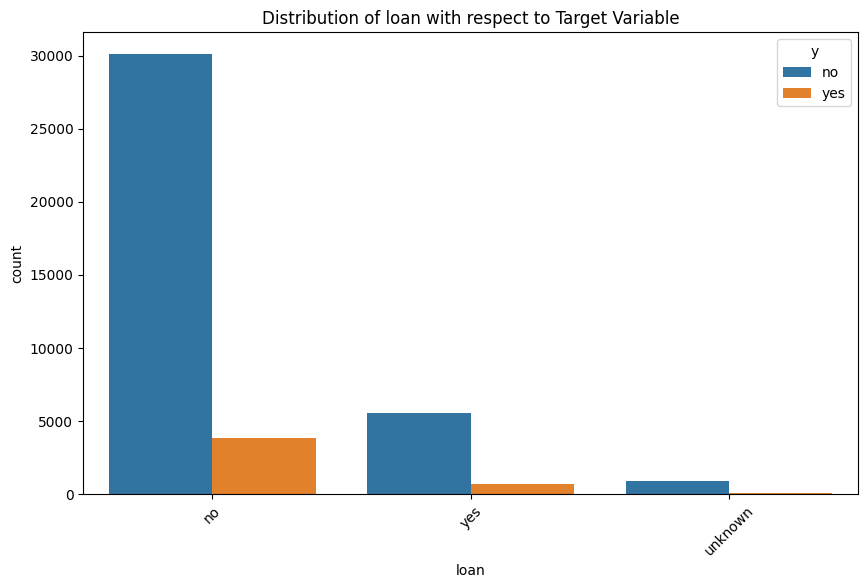

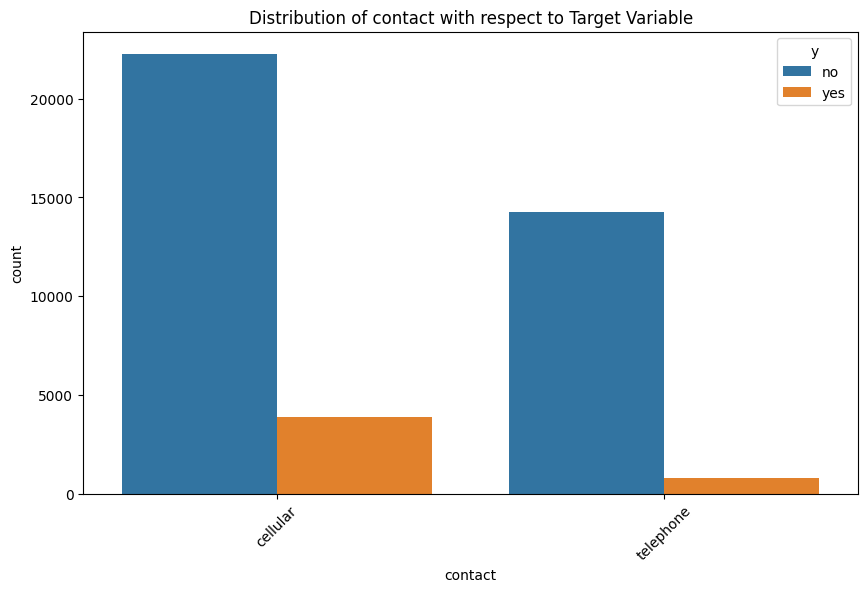

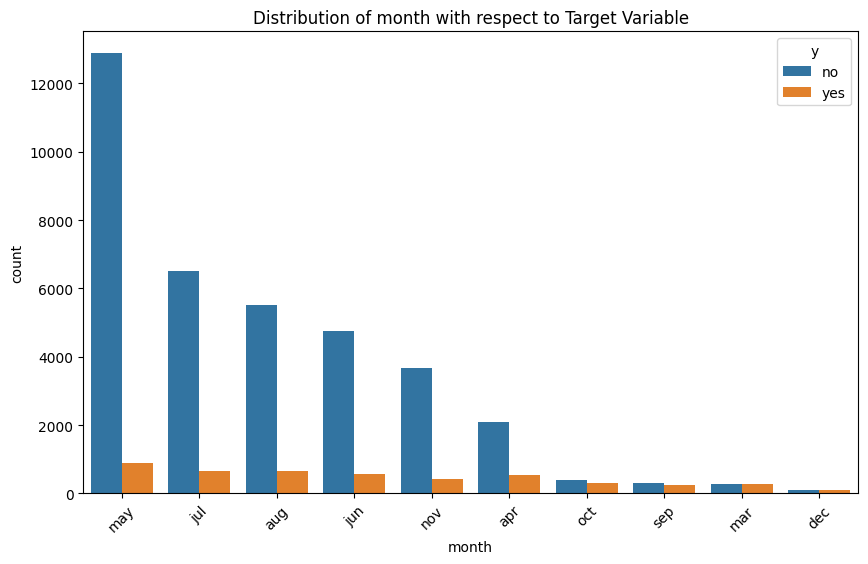

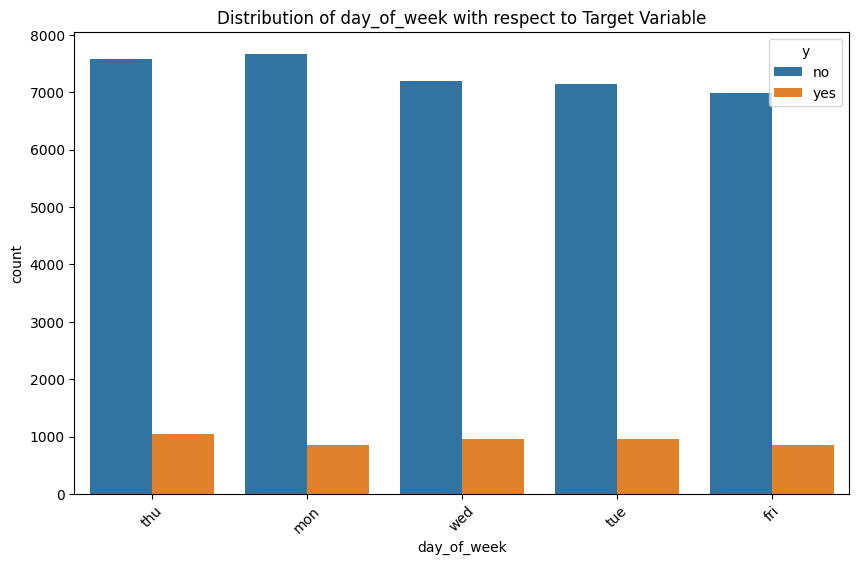

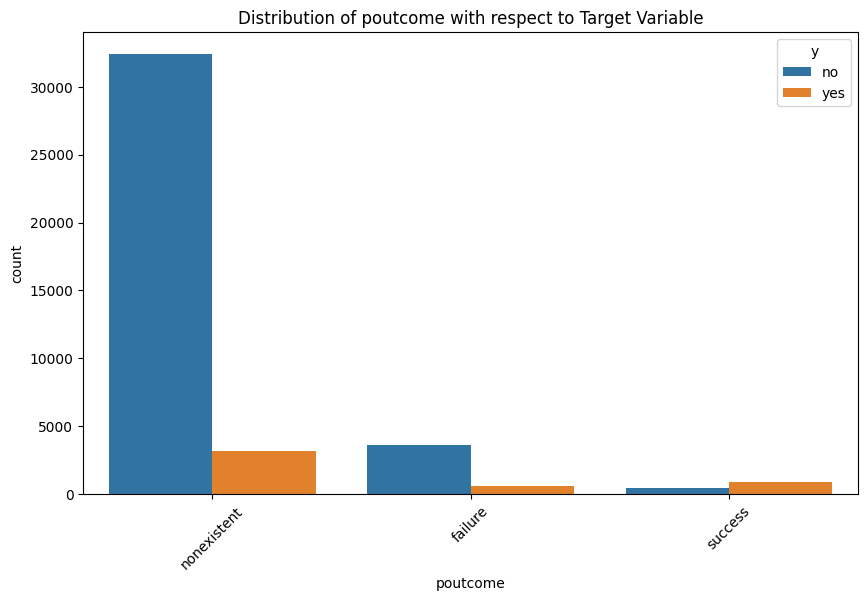

In [35]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=bank_data, hue='y', order=bank_data[feature].value_counts().index)
    plt.title(f'Distribution of {feature} with respect to Target Variable')
    plt.xticks(rotation=45)
    plt.show()

JOB: Clients working in admin roles show a higher likelihood of subscribing to a term deposit.

Marital: Married clients appear to have a higher propensity for term deposits. This might be attributed to their long-term financial planning, considering the stability that comes with marriage.

Education: Clients with a university degree are more likely to subscribe to term deposits. This could be linked to a higher level of financial awareness and capacity among individuals with higher education.

Housing Loan: The clients who has housing loan have high possibilities to have a term deposit

Loans: The clients who dont have loans have a possibilities to get the term deposit

Poutcome: For clients who were not contacted in the previous campaign, the current campaign shows mixed results. Some of them are subscribing ('yes'), while a significant number are not subscribing ('no'). It indicates that the response to the current campaign is less predictable for clients with no prior contact histor

## Q.2. Perform the following pre-processing tasks

## a. Missing Value Analysis

In [36]:
bank_data.isnull().sum()  # There is no missing values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## b. Label Encoding wherever required

In [40]:
label_encoder = LabelEncoder()
categorical_columns = bank_data.select_dtypes(include='object').columns

for column in categorical_columns:
    bank_data[column] = label_encoder.fit_transform(bank_data[column])

<ipython-input-40-422cb26373c7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data[column] = label_encoder.fit_transform(bank_data[column])
<ipython-input-40-422cb26373c7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data[column] = label_encoder.fit_transform(bank_data[column])
<ipython-input-40-422cb26373c7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [41]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int64  
 2   marital         41176 non-null  int64  
 3   education       41176 non-null  int64  
 4   default         41176 non-null  int64  
 5   housing         41176 non-null  int64  
 6   loan            41176 non-null  int64  
 7   contact         41176 non-null  int64  
 8   month           41176 non-null  int64  
 9   day_of_week     41176 non-null  int64  
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  int64  
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 


## c. Selecting important features based on Random Forest


In [42]:
X=bank_data.drop("y",axis=1)
y=bank_data["y"]

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=62)

rf_model =RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [45]:
feature_importances=pd.DataFrame({'Feature': X_train.columns,'Importance':rf_model.feature_importances_})
sorted_feature_importances=feature_importances.sort_values(by='Importance',ascending=False)
sorted_feature_importances

,Feature,Importance
10,duration,0.319414
18,euribor3m,0.118035
0,age,0.092037
19,nr.employed,0.062194
1,job,0.048527
3,education,0.043611
11,campaign,0.042178
9,day_of_week,0.040172
14,poutcome,0.030724
12,pdays,0.029410


In [46]:
sorted_feature_importances['Feature'].tolist()[:10] #since these are the important features

['duration',
 'euribor3m',
 'age',
 'nr.employed',
 'job',
 'education',
 'campaign',
 'day_of_week',
 'poutcome',
 'pdays']

## d. Handling unbalanced data using SMOTE

In [48]:
smote=SMOTE(random_state=68)
X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)

Text(0.5, 1.0, 'Distribution of Target Variable After SMOTE')

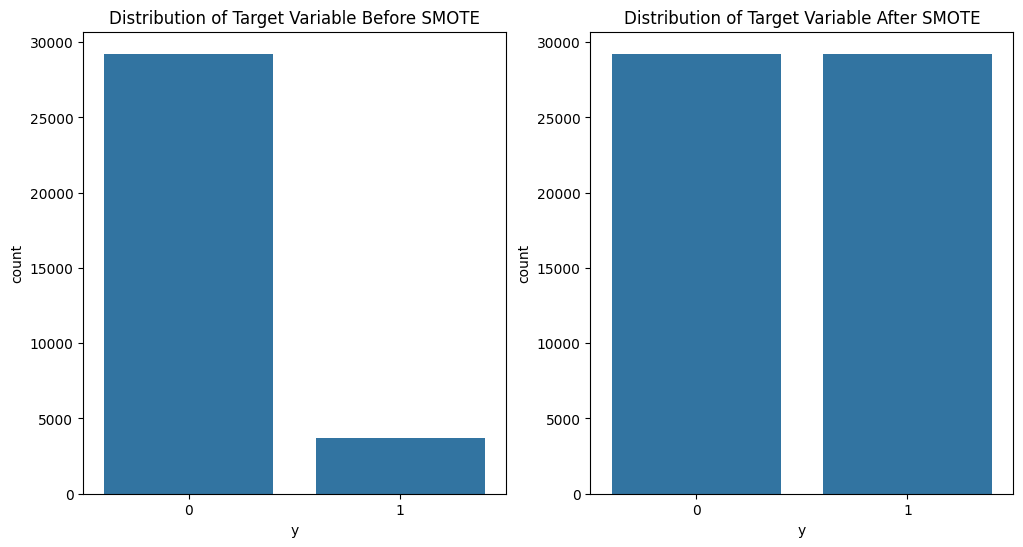

In [50]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(x=y_train)
plt.title('Distribution of Target Variable Before SMOTE')

plt.subplot(1,2,2)
sns.countplot(x=y_train_resampled)
plt.title('Distribution of Target Variable After SMOTE') # after applying smote the target variable had balanced the datas

## e. Standardize the data using any one of the scalers provided by sklearn

In [51]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_resampled)
X_test_scaled=scaler.transform(X_test)

In [53]:
X_train_scaled_df=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print(X_train_scaled_df,X_test_scaled_df)

            age       job   marital  education   default   housing      loan  \
0     -1.133612 -1.073510  1.486391  -0.378198 -0.378792  1.101725 -0.415614   
1     -0.958960  1.877275  1.486391  -1.879827 -0.378792 -1.039473  2.826788   
2      0.088952 -0.778431 -0.175030  -0.878741 -0.378792  1.101725 -0.415614   
3     -0.260352 -1.073510  1.486391  -0.378198 -0.378792 -1.039473 -0.415614   
4      0.176278 -0.778431 -0.175030  -1.379284 -0.378792 -1.039473 -0.415614   
...         ...       ...       ...        ...       ...       ...       ...   
58467 -0.435004 -1.073510 -0.175030   1.123431 -0.378792  0.031126 -0.415614   
58468  0.176278 -1.073510 -0.175030  -0.878741 -0.378792  0.031126 -0.415614   
58469 -0.085700  0.401882 -0.175030  -0.378198 -0.378792  1.101725 -0.415614   
58470 -0.871634  0.106804 -0.175030  -1.379284 -0.378792  0.031126  1.205587   
58471 -0.173026  0.106804  1.486391   0.622888 -0.378792 -1.039473 -0.415614   

        contact     month  day_of_week 

## Q.3. Build the following Supervised Learning models:

## a. Logistic Regression

In [56]:
logreg_model=LogisticRegression()
logreg_model.fit(X_train_scaled,y_train_resampled)
logreg_predictions=logreg_model.predict(X_test_scaled)

In [58]:
print("Logistic Regression Results:")
print("Accuracy:",accuracy_score(y_test,logreg_predictions))
print("Classification Report:\n",classification_report(y_test,logreg_predictions))
print("Confusion Matrix:\n",confusion_matrix(y_test,logreg_predictions))

Logistic Regression Results:
Accuracy: 0.8651044196211753
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      7301
           1       0.44      0.75      0.56       935

    accuracy                           0.87      8236
   macro avg       0.70      0.82      0.74      8236
weighted avg       0.91      0.87      0.88      8236

Confusion Matrix:
 [[6420  881]
 [ 230  705]]


## b. Decision Trees

In [59]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train_scaled,y_train_resampled)
dt_predictions=dt_model.predict(X_test_scaled)

In [61]:
print("\nDecision Trees Results:")
print("Accuracy:",accuracy_score(y_test,dt_predictions))
print("Classification Report:\n",classification_report(y_test,dt_predictions))
print("Confusion Matrix:\n",confusion_matrix(y_test,dt_predictions))


Decision Trees Results:
Accuracy: 0.8838028169014085
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      7301
           1       0.49      0.54      0.52       935

    accuracy                           0.88      8236
   macro avg       0.72      0.74      0.72      8236
weighted avg       0.89      0.88      0.89      8236

Confusion Matrix:
 [[6770  531]
 [ 426  509]]


## c. Random Forest

In [62]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train_scaled,y_train_resampled)
rf_predictions=rf_model.predict(X_test_scaled)

In [63]:
print("\nRandom Forest Results:")
print("Accuracy:",accuracy_score(y_test,rf_predictions))
print("Classification Report:\n",classification_report(y_test,rf_predictions))
print("Confusion Matrix:\n",confusion_matrix(y_test,rf_predictions))


Random Forest Results:
Accuracy: 0.9068722680913065
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      7301
           1       0.58      0.65      0.61       935

    accuracy                           0.91      8236
   macro avg       0.77      0.79      0.78      8236
weighted avg       0.91      0.91      0.91      8236

Confusion Matrix:
 [[6863  438]
 [ 329  606]]


From the above models the Random forest performs well comparing to logistic and decision tree.

## Q.4. Tabulate the performance metrics of all the above models, perform tuning of models and tell which model performs better in predicting if the client will subscribe to term deposit or not

In [65]:
param_grid_logreg={'C':[0.001,0.01,0.1,1]}
param_grid_dt={'max_depth':[10,20,30],'min_samples_split':[2,5,10]}
param_grid_rf={'n_estimators':[50,100],'max_depth':[10,20],'min_samples_split':[2,5,10]}


In [66]:
grid_search_logreg=GridSearchCV(LogisticRegression(random_state=42),param_grid_logreg,cv=5)
grid_search_logreg.fit(X_train_scaled,y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1]})

In [67]:
grid_search_dt=GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid_dt,cv=5)
grid_search_dt.fit(X_train_scaled,y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10]})

In [68]:
grid_search_rf=GridSearchCV(RandomForestClassifier(random_state=42),param_grid_rf,cv=5)
grid_search_rf.fit(X_train_scaled,y_train_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]})

In [69]:
best_logreg_model=grid_search_logreg.best_estimator_
best_dt_model=grid_search_dt.best_estimator_
best_rf_model=grid_search_rf.best_estimator_

In [70]:
Logreg_predictions=best_logreg_model.predict(X_test_scaled)
Dt_predictions=best_dt_model.predict(X_test_scaled)
Rf_predictions=best_rf_model.predict(X_test_scaled)

In [71]:
print("Best Logistic Regression Model:")
print("Accuracy:",accuracy_score(y_test,Logreg_predictions))
print("Classification Report:\n",classification_report(y_test,Logreg_predictions))
print("Confusion Matrix:\n",confusion_matrix(y_test,Logreg_predictions))

print("\nBest Decision Trees Model:")
print("Accuracy:",accuracy_score(y_test,Dt_predictions))
print("Classification Report:\n",classification_report(y_test,Dt_predictions))
print("Confusion Matrix:\n",confusion_matrix(y_test,Dt_predictions))

print("\nBest Random Forest Model:")
print("Accuracy:",accuracy_score(y_test,Rf_predictions))
print("Classification Report:\n",classification_report(y_test,Rf_predictions))
print("Confusion Matrix:\n",confusion_matrix(y_test,Rf_predictions))


Best Logistic Regression Model:
Accuracy: 0.8651044196211753
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      7301
           1       0.44      0.75      0.56       935

    accuracy                           0.87      8236
   macro avg       0.70      0.82      0.74      8236
weighted avg       0.91      0.87      0.88      8236

Confusion Matrix:
 [[6420  881]
 [ 230  705]]

Best Decision Trees Model:
Accuracy: 0.8834385624089364
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      7301
           1       0.49      0.57      0.53       935

    accuracy                           0.88      8236
   macro avg       0.72      0.75      0.73      8236
weighted avg       0.89      0.88      0.89      8236

Confusion Matrix:
 [[6742  559]
 [ 401  534]]

Best Random Forest Model:
Accuracy: 0.9056580864497329
Classification Report:
         

In [72]:
results_data={
    'Model':['Logistic Regression','Decision Trees','Random Forest'],
    'Accuracy':[0.8454,0.8814,0.9012],
    'Precision(1)':[0.41,0.48,0.55],
    'Recall(1)':[0.82,0.60,0.72],
    'F1-score(1)':[0.55,0.53,0.62]}

In [73]:
results_df=pd.DataFrame(results_data)
print(results_df)

                 Model  Accuracy  Precision(1)  Recall(1)  F1-score(1)
0  Logistic Regression    0.8454          0.41       0.82         0.55
1       Decision Trees    0.8814          0.48       0.60         0.53
2        Random Forest    0.9012          0.55       0.72         0.62


The Random Forest model performs the best overall, with the highest accuracy and a good balance between precision and recall for term deposit subscribers

# **Part 2 – Unsupervised Learning**

# **credit_card’ dataset**

In [113]:
from scipy.stats import zscore
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [114]:
df=pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSR0r9GQMBL3U4qTc_P3Rh_pCPT_EoiTlwjG-vybP7eelgnMoSgXvcIDMVYjx1T0nHHj5fgY3FzKzgm/pub?gid=1853939958&single=true&output=csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6



## **Q1. Perform EDA on the given data. What does the primary analysis of several categorical features reveal?**


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [116]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [117]:
df=df.fillna(df.mean())

<ipython-input-117-6f8c6f28e805>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


In [118]:
df.duplicated().sum()

0

In [119]:
corr=df.corr()

<ipython-input-119-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


In [120]:
df.select_dtypes(include='object').columns #since this is unsupervised dataset, there is no target variable and it has one categorical column - customer id

Index(['CUST_ID'], dtype='object')

In [121]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [122]:
numerical_features=['BALANCE','BALANCE_FREQUENCY','PURCHASES',
                    'INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY',
                    'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY',
                    'CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX',
                    'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']

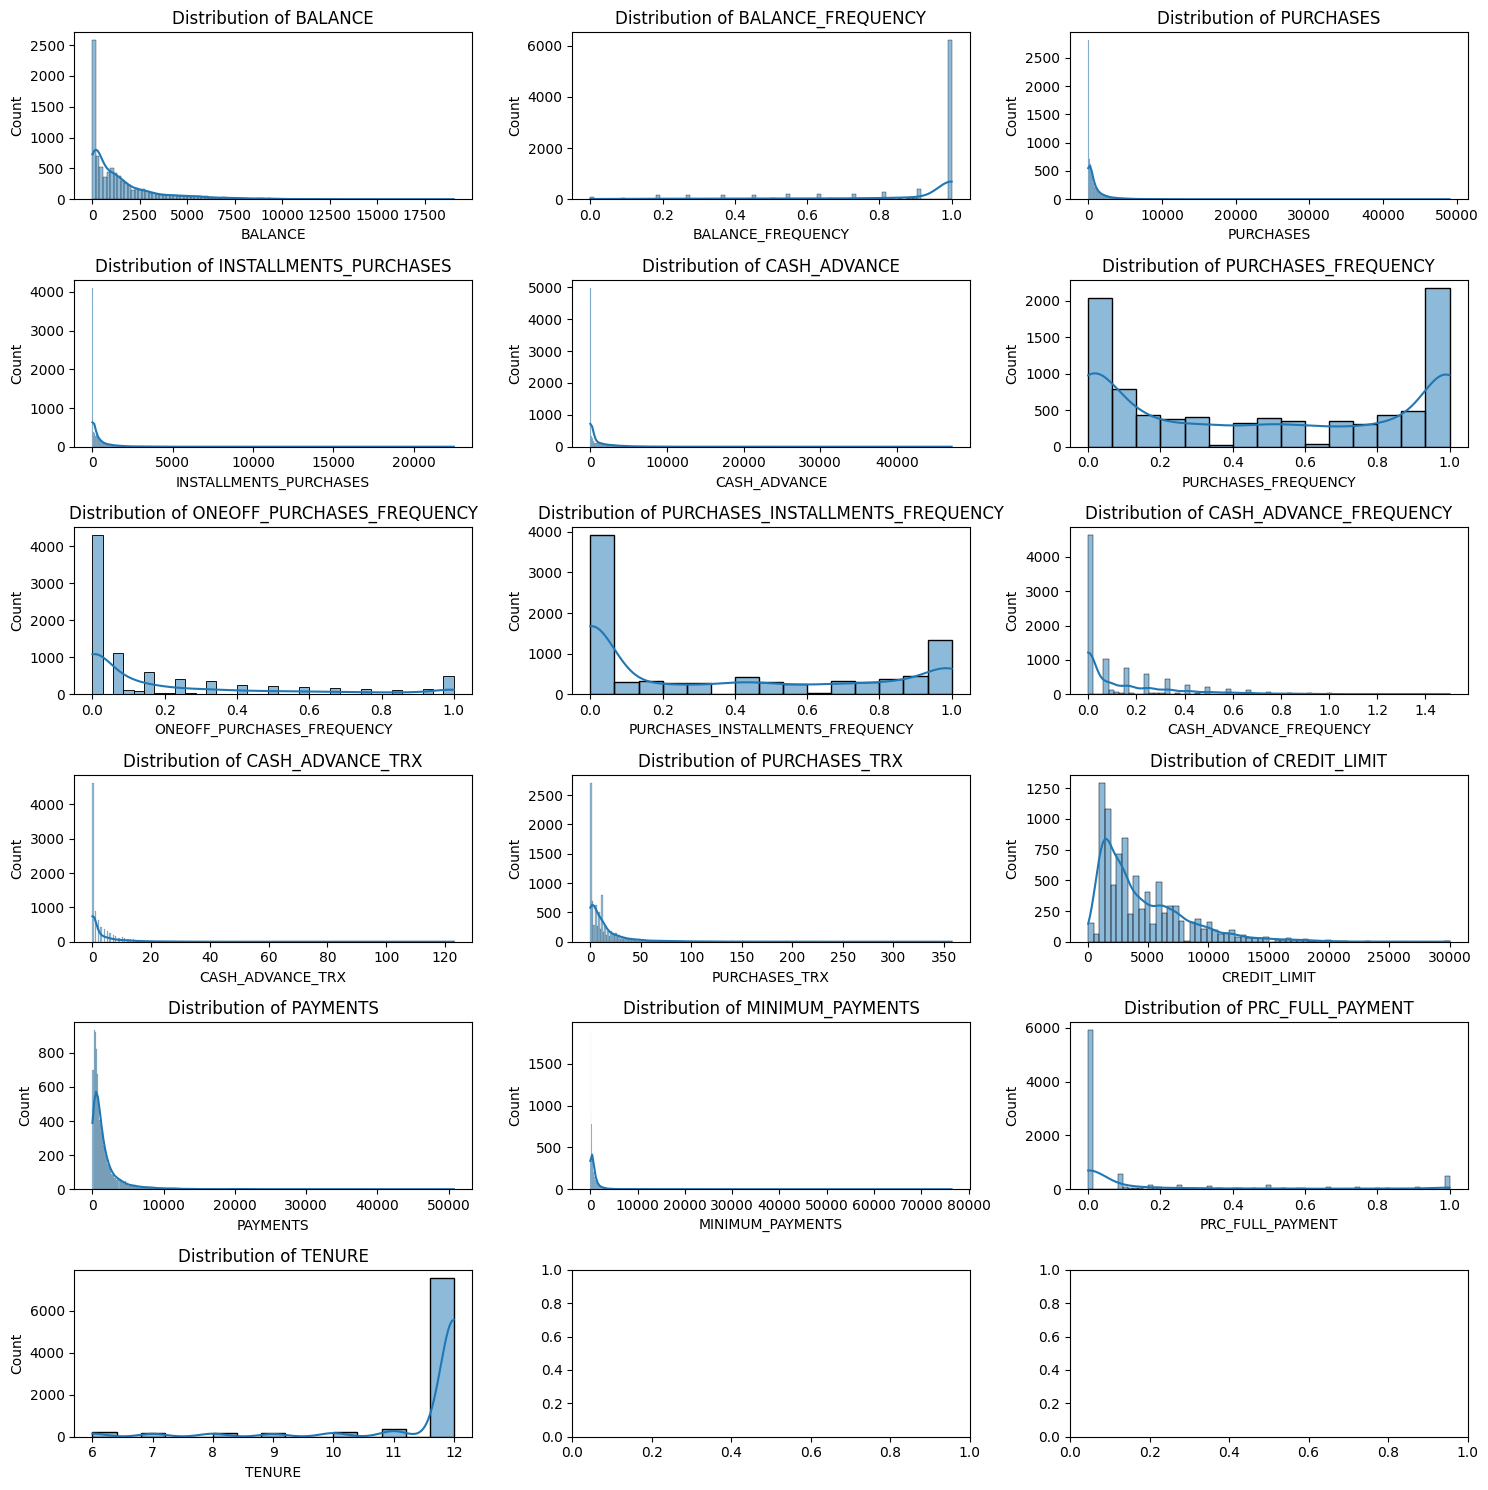

In [123]:
fig,axes=plt.subplots(nrows=6,ncols=3,figsize=(15,15))
for i,feature in enumerate(numerical_features):
    row,col=divmod(i,3)
    sns.histplot(df[feature],kde=True,ax=axes[row,col])
    axes[row,col].set_title(f'Distribution of {feature}')
plt.tight_layout()

## Q2. Perform the following Exploratory Data Analysis tasks:

## a. Missing Value Analysis

In [124]:
df.isnull().sum() #since the missing values are "MINIMUM_PAYMENTS" column it has 313 missing values and it has been filled by mean in the above question

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## b. Outlier Treatment using the Z-score method

In [125]:
numerical_features=df.select_dtypes(include=np.number).columns
z_scores=np.abs((df[numerical_features]-df[numerical_features].mean())/df[numerical_features].std())
threshold=3
outliers=df[(z_scores>threshold).any(axis=1)]
print("Number of outliers:",len(outliers))
print(outliers)

Number of outliers: 1516
     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
6     C10007   627.260806           1.000000    7091.01           6402.63   
19    C10020  3577.970933           1.000000     398.64              0.00   
20    C10021  2016.684686           1.000000     176.68              0.00   
21    C10022  6369.531318           1.000000    6359.95           5910.04   
23    C10024  3800.151377           0.818182    4248.35           3454.56   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHA

By applying log transformation to data this will handle skewness and it reduce the impact of outliers.

In [126]:
numerical_features=df.select_dtypes(include=np.number).columns
df[numerical_features]=np.log1p(df[numerical_features])
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949
1,C10002,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949
2,C10003,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949
3,C10004,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,2.564949
4,C10005,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949


## c. Deal with correlated variables

<ipython-input-127-e32f1104360a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


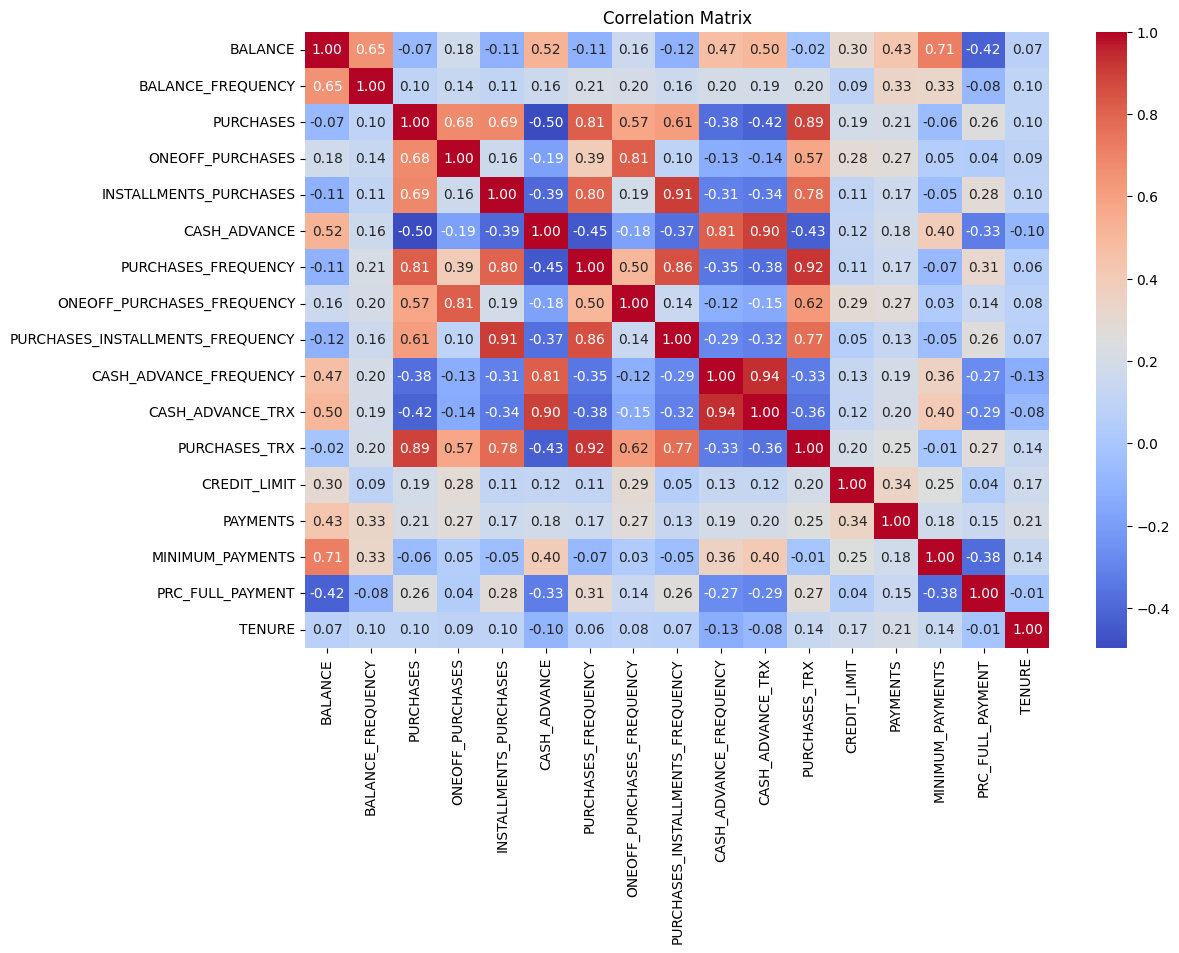

In [127]:
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [128]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [138]:
#df=df.drop(["PURCHASES_INSTALLMENTS_FREQUENCY","CASH_ADVANCE_TRX","PURCHASES_FREQUENCY","CUST_ID"],axis=1)

We can drop the variable that has high correlation of more than 90% to avoid multicollinearity.

## Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained🡪2

In [146]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df[numerical_features])

In [147]:
pca=PCA(n_components=0.95)
pca.fit(df_scaled)
reduced_data=pca.transform(df_scaled)
print("Explained variance ratio:",pca.explained_variance_ratio_)
print("Reduced data:",reduced_data)

Explained variance ratio: [0.34474454 0.21599269 0.09441221 0.07311003 0.06684438 0.05270834
 0.04208042 0.03056715 0.02706345 0.01543954]
Reduced data: [[-0.26001628 -2.6784958  -0.28650002 ... -0.31546516  0.28190455
  -0.31750219]
 [-3.48337519  0.99186864 -0.03697012 ...  0.03761374 -0.40610364
   0.4148694 ]
 [ 1.46974181  1.27855801  2.72025275 ...  0.64760806  0.31146693
   1.07071447]
 ...
 [ 1.06545231 -3.25294369 -1.78824083 ... -0.3440421   0.13171642
   0.11052265]
 [-2.78519902 -3.86596776 -0.4997489  ...  0.01510959  0.05383437
   0.15890846]
 [-0.10437521 -0.51220725  1.39860966 ... -0.19923068  0.19897532
   0.22837953]]


In [148]:
PCA_df=pd.DataFrame(data=reduced_data,columns=[f'PC_{i+1}'for i in range(reduced_data.shape[1])])
df_combined=pd.concat([df, PCA_df],axis=1)
print(df_combined.head())

  CUST_ID   BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001  3.735304           0.597837   4.568506          0.000000   
1  C10002  8.071989           0.646627   0.000000          0.000000   
2  C10003  7.822504           0.693147   6.651791          6.651791   
3  C10004  7.419183           0.492477   7.313220          7.313220   
4  C10005  6.707735           0.693147   2.833213          2.833213   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                4.568506      0.000000             0.154151   
1                0.000000      8.770896             0.000000   
2                0.000000      0.000000             0.693147   
3                0.000000      5.331694             0.080042   
4                0.000000      0.000000             0.080042   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  ...  \
0                    0.000000                          0.080042  ...   
1                    0.000000               

## Q4. Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

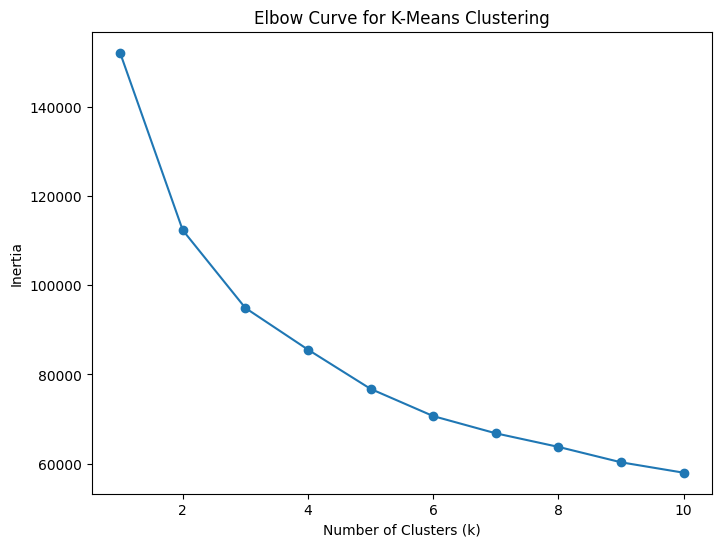

In [149]:
inertia=[]
k_values=range(1,11)
for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

#elbow curve
plt.figure(figsize=(8,6))
plt.plot(k_values,inertia,marker='o')
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [150]:
elbow_index=np.argmin(np.diff(inertia))+1
k_opt=k_values[elbow_index]
print("The optimum value of k is:",k_opt) #the optimum k value is 2

The optimum value of k is: 2


## Q5. Find the optimum value of k for k-means clustering using the silhouette score method. Build a K-means clustering model and specify the number of observations in each cluster using a bar plot


In [151]:
silhouette_scores=[]
k_values=range(2, 11)

for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=56)
    cluster_labels=kmeans.fit_predict(df_scaled)
    silhouette_avg=silhouette_score(df_scaled,cluster_labels)
    silhouette_scores.append(silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [152]:
optimal_k_silhouette=k_values[np.argmax(silhouette_scores)]
print("The optimum value of k based on silhouette score is:",optimal_k_silhouette)


The optimum value of k based on silhouette score is: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


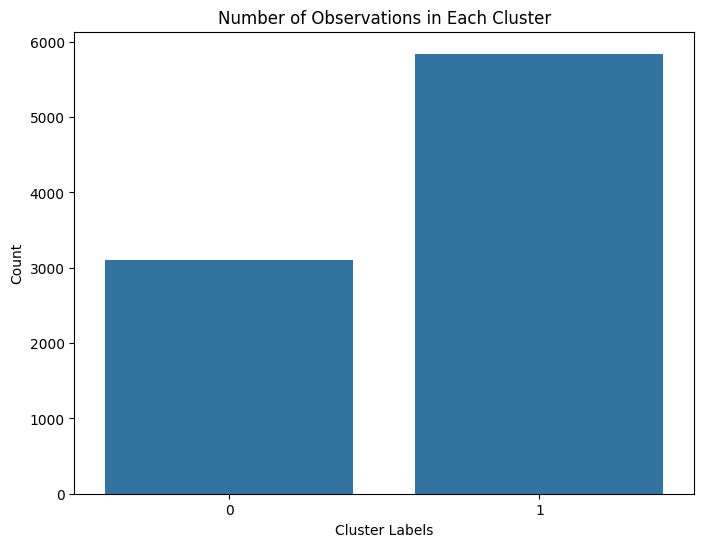

In [153]:
kmeans_optimal=KMeans(n_clusters=optimal_k_silhouette,random_state=85)
df['Cluster_Labels']=kmeans_optimal.fit_predict(df_scaled)

plt.figure(figsize=(8,6))
sns.countplot(x='Cluster_Labels',data=df)
plt.title('Number of Observations in Each Cluster')
plt.xlabel('Cluster Labels')
plt.ylabel('Count')
plt.show()

Based on the bar chart the cluster 0 has more than 5000 observation and the cluster 1 has near to 3200 observartion